In [48]:
#Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import numpy as np

In [49]:
import os
os.environ["OMP_NUM_THREADS"] = '3'

In [50]:
#import the data
df = pd.read_csv('./loans_train_prepared-1.csv')

TASK 2

In [51]:
Get_sum_of_squared_distances = []
k = range(1,10)
for num_clusters in k :
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(df)
    Get_sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(k,Sum_of_squared_distances,"bx-")
plt.xlabel("Values for k") 
plt.ylabel("Sum of squared distances/Inertia") 
plt.title("Optimal k using Elbow method")
plt.show()

C:\Users\sgais\AppData\Roaming\Python\Python37\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  "KMeans is known to have a memory leak on Windows "


In [52]:
#silhouette analysis, method for determining the best value of k:
#This will plot the silhouette score for various values of k. 
#The optimal value of k is the one that maximizes the silhouette score.
from sklearn.metrics import silhouette_score

sil_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    score = silhouette_score(df, kmeans.labels_)
    sil_scores.append(score)

plt.plot(range(2, 11), sil_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

In [53]:
#Perform k-means clustering with the optimal value(s) of k:
k = 8
kmeans = KMeans(n_clusters=k)
kmeans.fit(df)
labels = kmeans.labels_

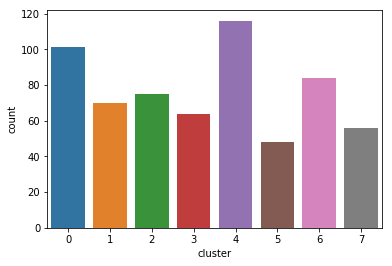

In [54]:
# Bar plot with count of observations in each cluster:
df_clustered = df.copy()
df_clustered['cluster'] = labels
sns.countplot(x='cluster', data=df_clustered)
plt.show()

TASK 3

In [46]:
from sklearn.manifold import TSNE

# Define the features for clustering
features = df.columns.tolist()

# Create the KMeans clustering object with the desired number of clusters
kmeans = KMeans(n_clusters=3)

# Fit the data to the clustering object
kmeans.fit(df[features])

# Extract the labels
labels = kmeans.labels_

# Apply t-SNE to reduce the dimensionality of the data
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(df[features])

# Visualize the clusters
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels)
plt.show()

C:\Users\sgais\AppData\Roaming\Python\Python37\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\sgais\AppData\Roaming\Python\Python37\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In this example, we're using KMeans to cluster the data into 3 clusters based on all 16 features. 
Then we're applying t-SNE to reduce the dimensionality of the data to 2 dimensions so that we can visualize it

In [47]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

X = df
   
for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(X)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.15345667241994654
For n_clusters=3, The Silhouette Coefficient is 0.14388831308365635
For n_clusters=4, The Silhouette Coefficient is 0.15494710569688916
For n_clusters=5, The Silhouette Coefficient is 0.1592810999712183
For n_clusters=6, The Silhouette Coefficient is 0.15465160854253787
For n_clusters=7, The Silhouette Coefficient is 0.1656360529073772
For n_clusters=8, The Silhouette Coefficient is 0.17449839211073995
For n_clusters=9, The Silhouette Coefficient is 0.17420798209294622
For n_clusters=10, The Silhouette Coefficient is 0.16218596760494802


It looks like the Silhouette Coefficient is relatively low for all cluster sizes, indicating that the data may not be well-suited for clustering. However, it appears that the Silhouette Coefficient is highest for n_clusters=9